# Data Preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset
df= pd.read_csv('station_data_dataverse.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i

In [6]:
#display columns
df.columns

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')

In [7]:
#calculate sum of null values
df.isnull().sum()

,0
sessionId,0
kwhTotal,0
dollars,0
created,0
ended,0
startTime,0
endTime,0
chargeTimeHrs,0
weekday,0
platform,0


In [ ]:
#display all columns
pd.set_option('display.max_columns', None)

In [8]:
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [9]:
#display null values
df[df.isnull().any(axis=1)]

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1865681,0.00,0.00,0015-09-25 19:10:00,0015-09-25 19:11:08,19,19,0.018889,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3209,7155296,0.00,0.00,0015-10-02 19:16:23,0015-10-02 19:18:07,19,19,0.028889,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3210,7688636,0.00,0.00,0015-10-02 19:18:45,0015-10-02 19:20:08,19,19,0.023056,Fri,ios,...,1,3,0,0,0,0,1,0,0,1
3282,5181950,0.00,0.00,0015-09-23 11:02:55,0015-09-23 13:03:05,11,13,2.002778,Wed,ios,...,1,2,0,0,1,0,0,0,0,1


In [10]:
#number of duplicate entries
print('Duplicate entries found in this dataset = {}.' .format(df.duplicated().sum()))

Duplicate entries found in this dataset = 0.


In [11]:
#describe data
df[['kwhTotal','dollars','startTime','endTime','chargeTimeHrs','distance']].describe()

,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,2330.000000
mean,5.809629,0.118268,13.743446,16.455965,2.841488,18.652378
std,2.892727,0.492562,3.204370,3.406732,1.507472,11.420571
min,0.000000,0.000000,0.000000,0.000000,0.012500,0.856911
25%,4.350000,0.000000,11.000000,14.000000,2.110278,5.135871
50%,6.230000,0.000000,13.000000,16.000000,2.808889,21.023826
75%,6.830000,0.000000,17.000000,20.000000,3.544167,27.285053
max,23.680000,7.500000,23.000000,23.000000,55.238056,43.059292


# Power Consumption by EV for each Charging Event

Text(0, 0.5, 'Power (kWh)')

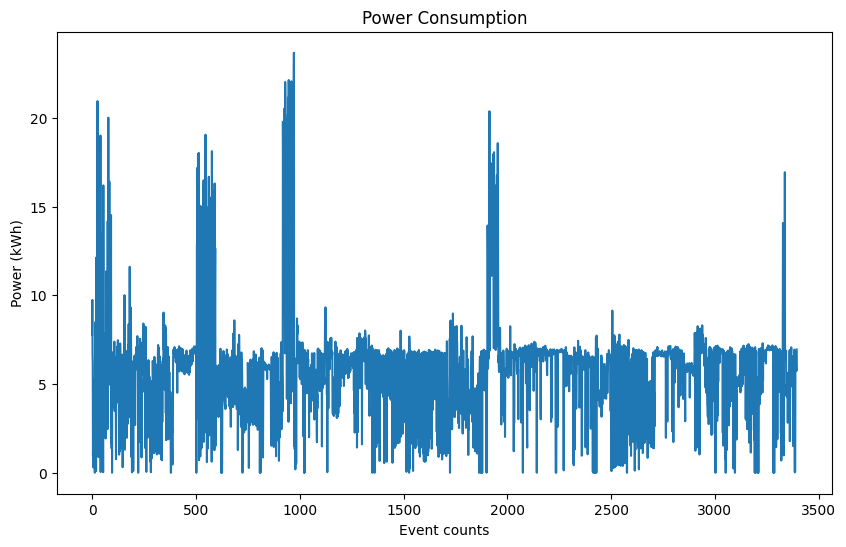

In [12]:
#visualize power consumption
plt.figure(figsize=(10,6))
sns.lineplot(df['kwhTotal'])
plt.title('Power Consumption')
plt.xlabel('Event counts')
plt.ylabel('Power (kWh)')

# Daily Power Consumption

In [13]:
# create a new column and convert 1 to manufacturing, 2 to office, 3 to R&D and 4 to others in facilityType
df['facilityType'] = df['facilityType'].replace([1,2,3,4],['Manufacturing','Office','R&D','Others'])

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.6% of the points cannot be plac

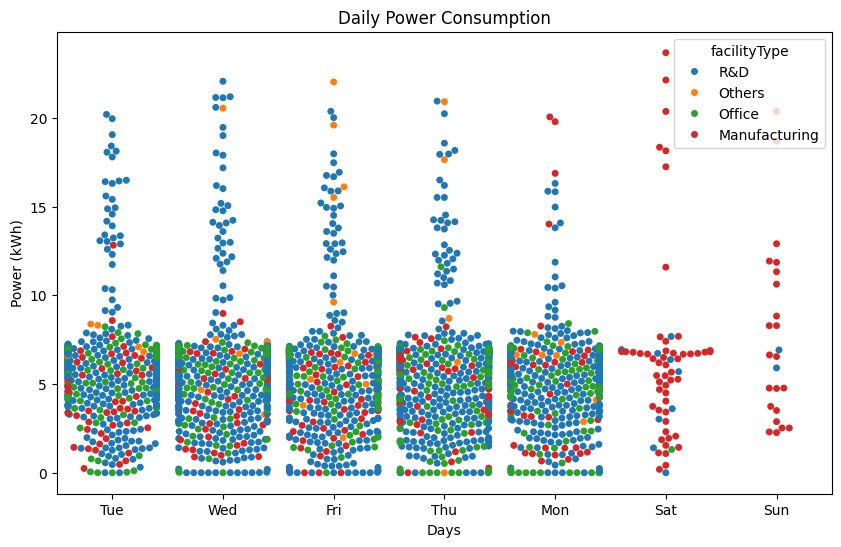

In [14]:
#convert facilityType to Catagorical data
df['facilityType'] = df['facilityType'].replace([1,2,3,4],['Manufacturing','Office','R&D','Others'])

#visualize daily power consumption
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, y='kwhTotal', x='weekday', hue='facilityType')
plt.title('Daily Power Consumption')
plt.xlabel('Days')
plt.ylabel('Power (kWh)')
plt.show()

# Charging Cost with respect to the charging duration


Text(0, 0.5, 'Charging Duration (hrs)')

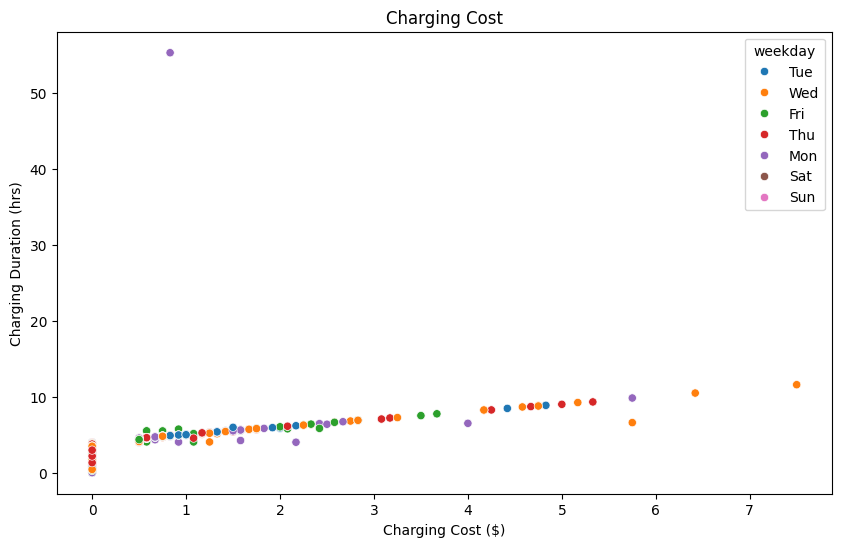

In [15]:
#visualize charging cost w.r.t charging duration
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='chargeTimeHrs', x='dollars', hue='weekday')
plt.title('Charging Cost')
plt.xlabel('Charging Cost ($)')
plt.ylabel('Charging Duration (hrs)')


Since the data distribution is badly affected with the preseence of an outlier, the Inter Queatile Range (IQR) method is applied to remove it.

In [16]:
#remove outliers in charging duration
Q1= df['chargeTimeHrs'].quantile(0.25)
Q3= df['chargeTimeHrs'].quantile(0.75)
IQR = Q3 - Q1


lower_bound= Q1 - 1.5* IQR
upper_bound= Q3 + 1.5* IQR

df = df[(df['chargeTimeHrs'] > lower_bound) & (df['chargeTimeHrs'] < upper_bound)]

Text(0, 0.5, 'Charging Duration (hrs)')

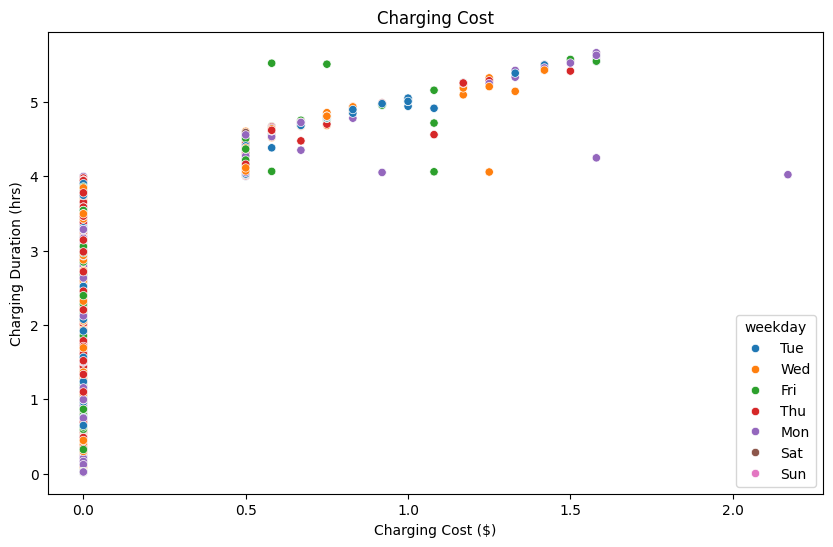

In [17]:
#visualize charging cost w.r.t charging duration
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='chargeTimeHrs', x='dollars', hue='weekday')
plt.title('Charging Cost')
plt.xlabel('Charging Cost ($)')
plt.ylabel('Charging Duration (hrs)')


After removing an outlier, a conclusion can be drawn that up to 4 hours the vehicle can be charged for free

# Average charging duration per day

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.1% of the points cannot be plac

Text(100.84722222222221, 0.5, 'Charging Duration (hrs)')

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.4% of the points cannot be plac

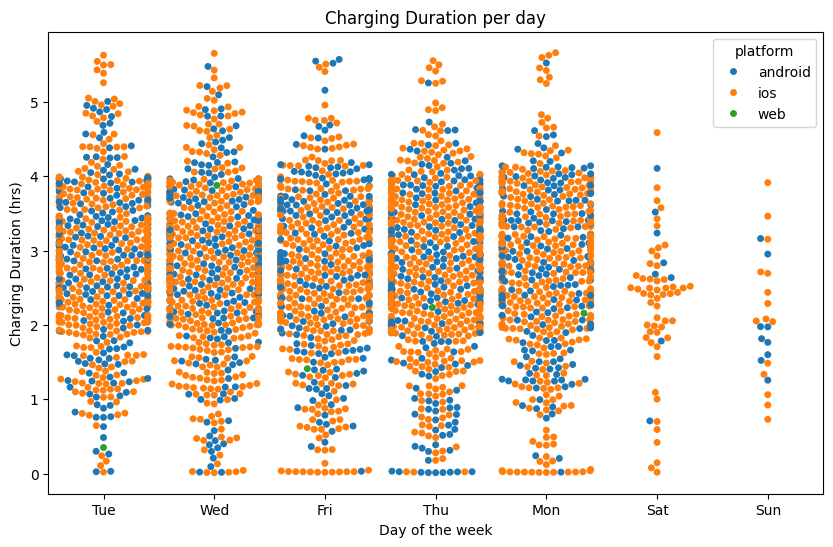

In [18]:
#visualize mean chargeTimeHr per day
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, y='chargeTimeHrs', x='weekday', hue='platform')
plt.title('Charging Duration per day')
plt.xlabel('Day of the week')
plt.ylabel('Charging Duration (hrs)')

In [19]:
#count the unqiue platform
df['platform'].value_counts() /len(df) * 100

,count
platform,
ios,65.587530
android,34.232614
web,0.179856


The above visualization entails most frequent EV charging time between 2 and 4 hours and around 65% EV owner used IOS to log the charging session.

# Installed Charging Stations Share at the Facility

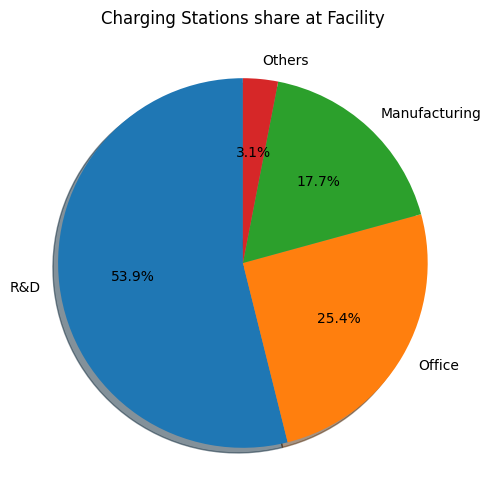

In [20]:

#pie chart of facilityType
plt.figure(figsize=(10,6))
df['facilityType'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Charging Stations share at Facility')
plt.ylabel('')
plt.show()

